# Proyecto Final - Módulo 4: MInería de Datos

### Integrantes del Equipo

Benítez Cervantes María Paula

Esquivel Osorio Flor Amanda

Gutiérrez Vanegas José Luis

## 1.- Business Understanding

### Contexto 

AirBnb hoy en día es una famosa y útil plataforma digital a nivel mundial dedicada al alquiler de habitaciones y alojamiento a particulares y turísticos, en los cuales el anfitrión puede publicar y contratar el arriendo de sus propiedades.

El presente caso de estudio muestra un análisis de un dataset de AirBnb en la CDMX, en el cual aplicamos 
técnicas de minería de datos para dar respuesta a hipotesis planteadas al analizar las características de los datos generados por esta plataforma. Encontrado así tendencias y el patrones de comportamiento de este dataset y generalizar los modelos resultantes.

Hipotesis #### Las del documento

## 2.- Data Understanding

En esta sección realizamos el análisis exploratorio de los datos.

Importamos las librerias

In [1]:
#Librerias para el Análisis exploratorio de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import missingno as msno
import seaborn as sns

#Librerias para la Regresión
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Librerias para el Clúster
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.legend_handler import HandlerLine2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
%matplotlib inline

c:\users\pcs\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Cargamos los datos.

In [2]:
df = pd.read_csv("AirBnb_Mexico.csv")
#Cargar los datos de github

### 2.1 Análisis exploratorio de datos

In [3]:
df.shape

(19030, 15)

In [4]:
df.head(4)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14714,Private room c/ bathroom . Colonia Juarez.,57785,Diego,Cuauhtémoc,19.43035,-99.15511,Private room,478,2,0,NaN,NaN,2,327
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,27/05/2019,0.52,9,355
2,33681,Couple of Rooms,145672,Edubiel,Tlalpan,19.27215,-99.21848,Private room,1740,1,0,NaN,NaN,1,365
3,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,1,0,NaN,NaN,2,363


In [5]:
variables = df.columns.values.tolist()
variables

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
df.columns = ['ID', 'RAZONSOCIAL', 'ID_HOST', 'HOST_NOMBRE', 'DELEGACION', 'LAT',
       'LON', 'TIPO_HABITACION', 'PRECIO', 'MIN_NOCHES',
       'N_COMENTARIOS', 'ULTIMO_COMENTARIO', 'COMENTARIOSXMES',
       'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD']

In [8]:
df.agg(['count', 'size', 'nunique'])

,ID,RAZONSOCIAL,ID_HOST,HOST_NOMBRE,DELEGACION,LAT,LON,TIPO_HABITACION,PRECIO,MIN_NOCHES,N_COMENTARIOS,ULTIMO_COMENTARIO,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD
count,19030,19017,19030,18968,19030,19030,19030,19030,19030,19030,19030,14222,14222,19030,19030
size,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030
nunique,19030,18542,12208,3898,16,10282,8655,3,364,62,268,1025,847,34,366


Verificamos si existen valores Nulos o NA.

In [9]:
df.isnull().any().any()

True

<AxesSubplot:>

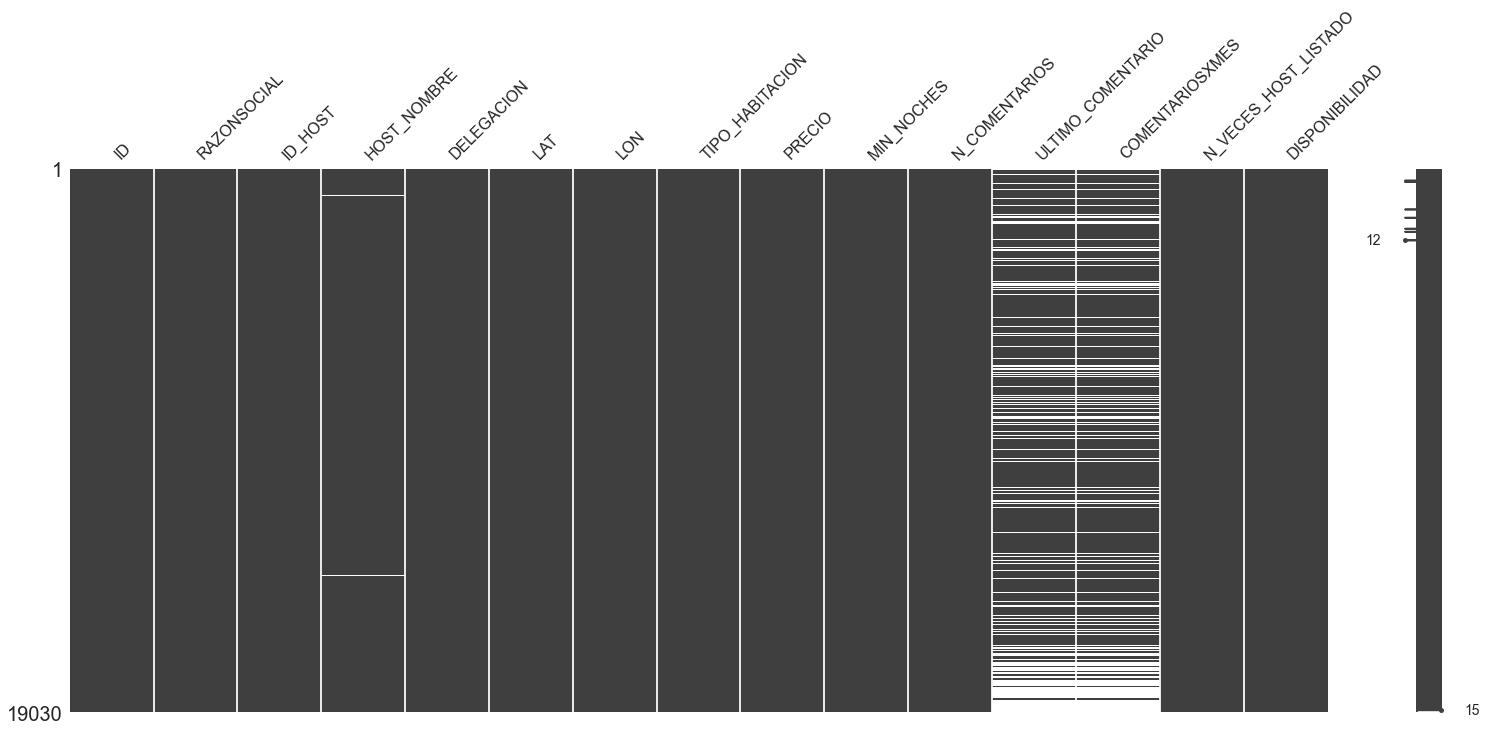

In [10]:
msno.matrix(df)

<AxesSubplot:>

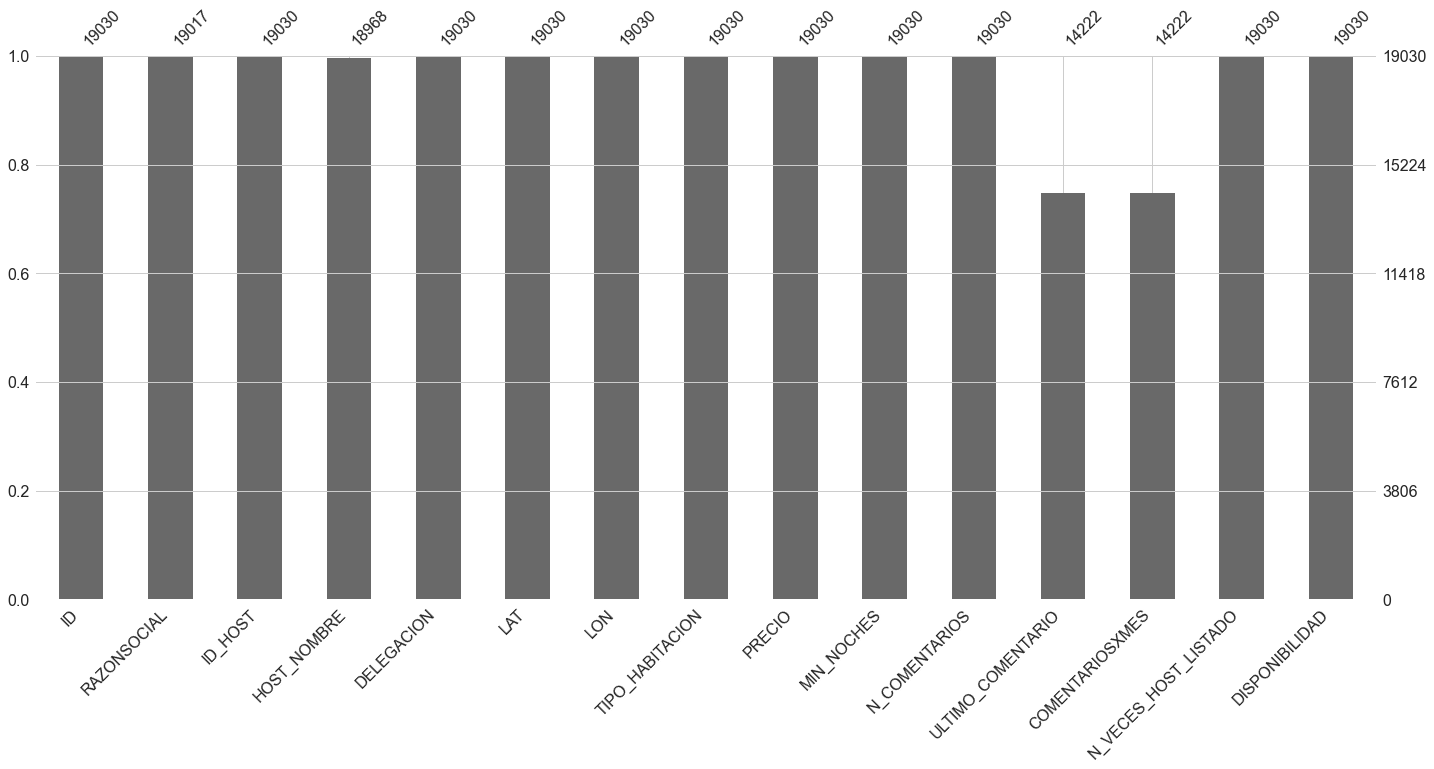

In [11]:
msno.bar(df)

In [12]:
df.columns[df.isnull().any()].tolist()

['RAZONSOCIAL', 'HOST_NOMBRE', 'ULTIMO_COMENTARIO', 'COMENTARIOSXMES']

Guardamos una copia del Dataframe original.

In [13]:
df_copia = df.copy()
df_copia.shape

(19030, 15)

Eliminamos los renglones con NA en el Dataframe original.

In [14]:
df = df.dropna()
df.shape

(14154, 15)

<AxesSubplot:>

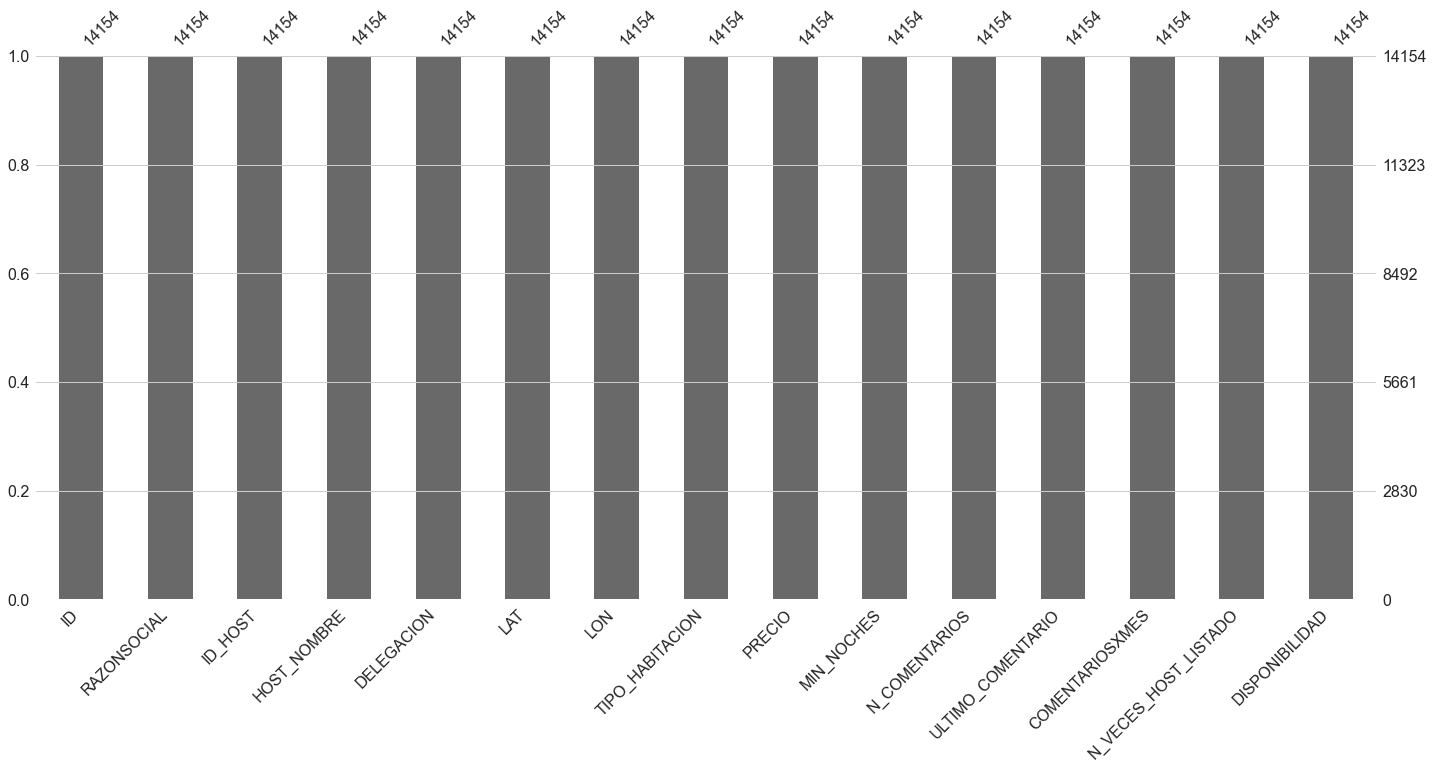

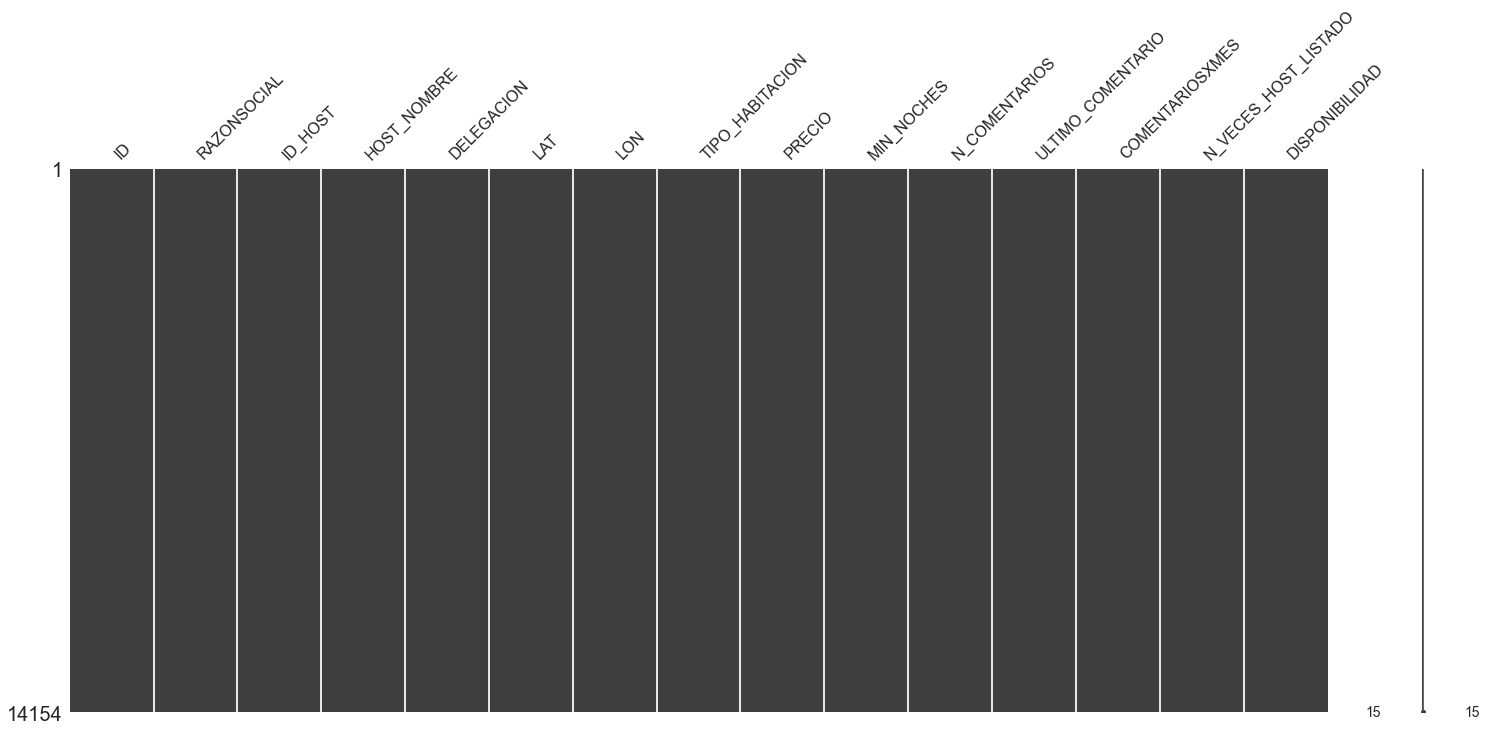

In [15]:
msno.bar(df)
msno.matrix(df)

#### Examinamos las variables cuantitativas.

In [16]:
df[['PRECIO', 'MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']].describe()

,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
count,14154.000000,14154.000000,14154.000000,14154.000000,14154.000000,14154.000000,14154.000000,14154.000000
mean,1058.935001,2.578847,26.883355,1.697628,4.234068,214.174438,19.400784,-99.168720
std,2492.151766,13.966202,39.395254,1.764299,6.858955,130.937909,0.041577,0.031347
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,19.168170,-99.340820
25%,401.000000,1.000000,3.000000,0.410000,1.000000,89.000000,19.381060,-99.179457
50%,707.000000,2.000000,11.000000,1.060000,2.000000,221.000000,19.412210,-99.168680
75%,1223.000000,2.000000,34.000000,2.400000,4.000000,346.000000,19.429595,-99.155300
max,191170.000000,1000.000000,470.000000,15.810000,45.000000,365.000000,19.533220,-98.964240


##### PRECIO

Text(0.5, 1.0, 'FRECUENCIA POR PRECIO')

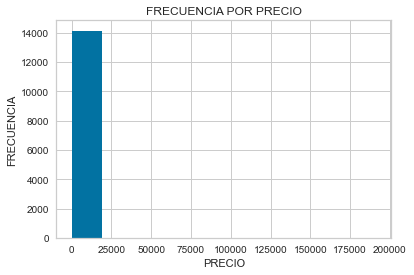

In [17]:
mpl.hist(df['PRECIO'])
mpl.xlabel('PRECIO')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR PRECIO')

La muestra completa es muy similar a una distribución Uniforme.

Text(0.5, 1.0, 'Box Plot del Precio del AirBnb')

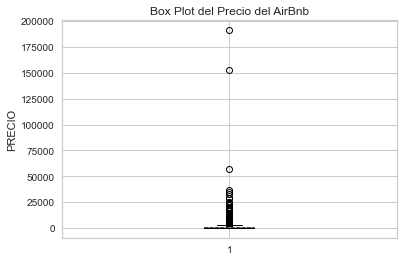

In [18]:
mpl.boxplot(df['PRECIO'], showmeans=True, meanline=True)
mpl.ylabel('PRECIO')
mpl.title('Box Plot del Precio del AirBnb')

Checamos la cantidad de outliers

In [19]:
df[df['PRECIO']>9000].shape

(57, 15)

Volvemos a graficar sin outliers.

Text(0.5, 1.0, 'FRECUENCIA POR PRECIO')

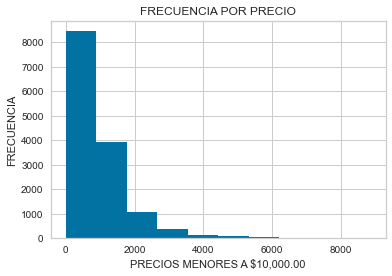

In [20]:
mpl.hist(df['PRECIO'][df['PRECIO']<9000])
mpl.xlabel('PRECIOS MENORES A $10,000.00')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR PRECIO')

Text(0.5, 1.0, 'Box Plot del Precio del AirBnb')

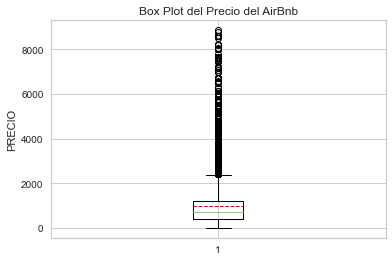

In [21]:
mpl.boxplot(df['PRECIO'][df['PRECIO']<9000], showmeans=True, meanline=True)
mpl.ylabel('PRECIO')
mpl.title('Box Plot del Precio del AirBnb')

##### MIN NOCHES

Text(0.5, 1.0, 'FRECUENCIA POR MIN_NOCHES')

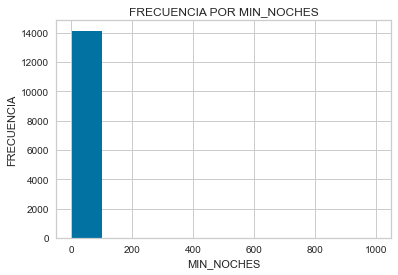

In [22]:
mpl.hist(df['MIN_NOCHES'])
mpl.xlabel('MIN_NOCHES')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR MIN_NOCHES')

La muestra completa es muy similar a una distribución Uniforme.

Text(0.5, 1.0, 'Box Plot del Minimo de noches de los AirBnb')

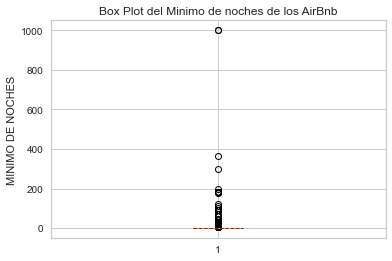

In [23]:
mpl.boxplot(df['MIN_NOCHES'], showmeans=True, meanline=True)
mpl.ylabel('MINIMO DE NOCHES')
mpl.title('Box Plot del Minimo de noches de los AirBnb')

Contamos la cantidad de outliers

In [24]:
df[df['MIN_NOCHES']>365].shape

(2, 15)

Graficamos de nuevo sin outliers.

Text(0.5, 1.0, 'FRECUENCIA POR MIN_NOCHES')

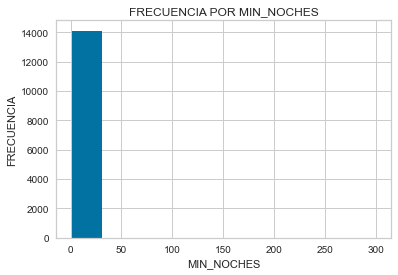

In [25]:
mpl.hist(df['MIN_NOCHES'][df['MIN_NOCHES']<365])
mpl.xlabel('MIN_NOCHES')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR MIN_NOCHES')

Aun así parece ser una distribución Uniforme.

Text(0.5, 1.0, 'Box Plot del Minimo de noches de los AirBnb')

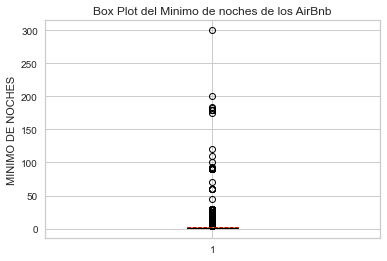

In [26]:
mpl.boxplot(df['MIN_NOCHES'][df['MIN_NOCHES']<365], showmeans=True, meanline=True)
mpl.ylabel('MINIMO DE NOCHES')
mpl.title('Box Plot del Minimo de noches de los AirBnb')

##### N COMENTARIOS 

Text(0.5, 1.0, 'FRECUENCIA POR N_COMENTARIOS')

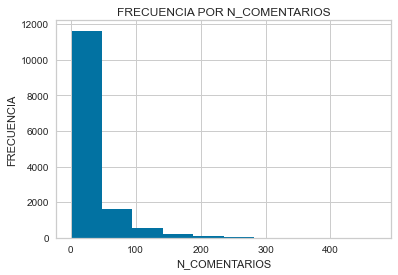

In [27]:
mpl.hist(df['N_COMENTARIOS'])
mpl.xlabel('N_COMENTARIOS')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR N_COMENTARIOS')

Text(0.5, 1.0, 'Box Plot del número de comentarios de los AirBnb')

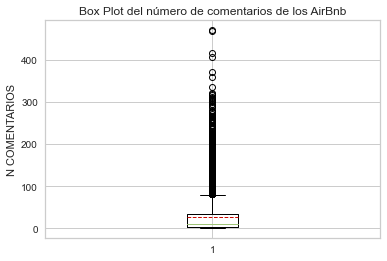

In [28]:
mpl.boxplot(df['N_COMENTARIOS'], showmeans=True, meanline=True)
mpl.ylabel('N COMENTARIOS')
mpl.title('Box Plot del número de comentarios de los AirBnb')

##### COMENTARIOS X MES

Text(0.5, 1.0, 'FRECUENCIA POR COMENTARIOSXMES')

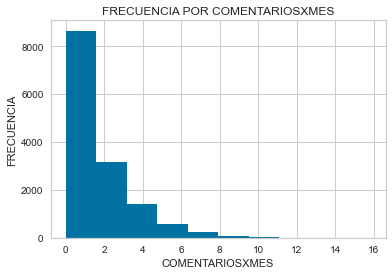

In [29]:
mpl.hist(df['COMENTARIOSXMES'])
mpl.xlabel('COMENTARIOSXMES')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR COMENTARIOSXMES')

Text(0.5, 1.0, 'Box Plot de comentarios por mes de los AirBnb')

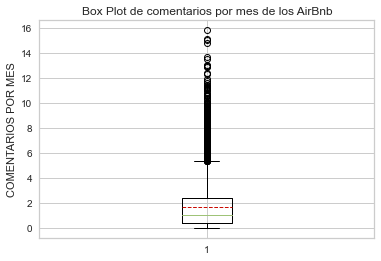

In [30]:
mpl.boxplot(df['COMENTARIOSXMES'], showmeans=True, meanline=True)
mpl.ylabel('COMENTARIOS POR MES')
mpl.title('Box Plot de comentarios por mes de los AirBnb')

##### N VECES HOST LISTADO 

Text(0.5, 1.0, 'FRECUENCIA POR N_VECES_HOST_LISTADO')

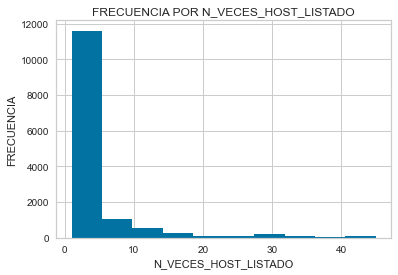

In [31]:
mpl.hist(df['N_VECES_HOST_LISTADO'])
mpl.xlabel('N_VECES_HOST_LISTADO')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR N_VECES_HOST_LISTADO')

Text(0.5, 1.0, 'Box Plot de número de veces que aparecioel host listado')

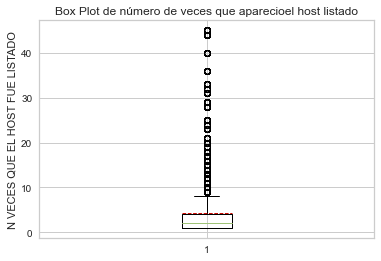

In [32]:
mpl.boxplot(df['N_VECES_HOST_LISTADO'], showmeans=True, meanline=True)
mpl.ylabel('N VECES QUE EL HOST FUE LISTADO')
mpl.title('Box Plot de número de veces que aparecioel host listado')

##### DISPONIBILIDAD

Text(0.5, 1.0, 'FRECUENCIA POR DISPONIBILIDAD')

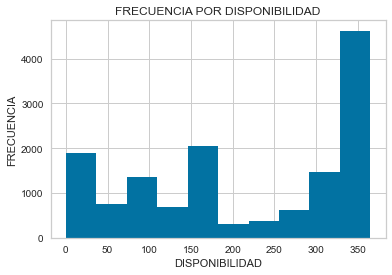

In [33]:
mpl.hist(df['DISPONIBILIDAD'])
mpl.xlabel('DISPONIBILIDAD')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR DISPONIBILIDAD')

Text(0.5, 1.0, 'Box Plot de número de días disponible al año')

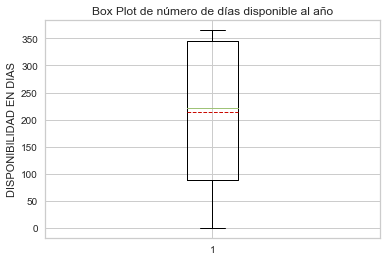

In [34]:
mpl.boxplot(df['DISPONIBILIDAD'], showmeans=True, meanline=True)
mpl.ylabel('DISPONIBILIDAD EN DIAS')
mpl.title('Box Plot de número de días disponible al año')

#### Examinamos las variables cualitativas.

In [35]:
df[['DELEGACION','TIPO_HABITACION',  'ULTIMO_COMENTARIO','ID', 'RAZONSOCIAL', 'ID_HOST', 'HOST_NOMBRE']]

,DELEGACION,TIPO_HABITACION,ULTIMO_COMENTARIO,ID,RAZONSOCIAL,ID_HOST,HOST_NOMBRE
1,Cuauhtémoc,Private room,27/05/2019,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego
4,Cuauhtémoc,Private room,02/05/2019,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX
5,Cuauhtémoc,Entire home/apt,28/05/2019,58955,Entire beautiful duplex in la Roma,282620,Nat
6,Cuauhtémoc,Private room,05/04/2019,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto
7,Cuauhtémoc,Entire home/apt,24/02/2019,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas
...,...,...,...,...,...,...,...
18873,Cuauhtémoc,Entire home/apt,23/06/2019,35846543,Welcome to Casa Frida in Reforma! cozy & charming,38718760,Laila
18900,Cuauhtémoc,Private room,23/06/2019,35883527,Tranquila habitaciÃ³n a una calle de Reforma,92679034,Julio
18914,Cuauhtémoc,Private room,21/06/2019,35897425,Private bed and bathroom,53026653,Julien
18921,Cuauhtémoc,Private room,23/06/2019,35905300,Trendiest PLACE w/ ROOM in the heart of La ROMA,108732399,Miguel


##### TIPO HABITACIÓN

In [36]:
df['TIPO_HABITACION'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [37]:
df['TIPO_HABITACION'].value_counts()

Entire home/apt    7684
Private room       6280
Shared room         190
Name: TIPO_HABITACION, dtype: int64

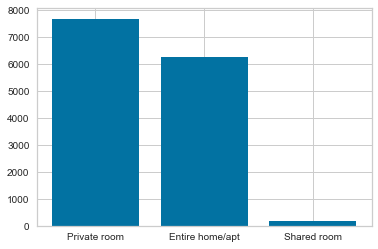

In [38]:
x = df['TIPO_HABITACION'].unique()
y = df['TIPO_HABITACION'].value_counts().values
mpl.bar(x,y)
mpl.show()

##### DELEGACIÓN

In [39]:
df['DELEGACION'].unique()

array(['Cuauhtémoc', 'Coyoacán', 'Miguel Hidalgo', 'Benito Juárez',
       'Azcapotzalco', 'Tlalpan', 'Iztapalapa', 'Venustiano Carranza',
       'Gustavo A. Madero', 'Xochimilco', 'Á\x81lvaro Obregón',
       'La Magdalena Contreras', 'Cuajimalpa de Morelos', 'Iztacalco',
       'Tláhuac', 'Milpa Alta'], dtype=object)

In [40]:
df['DELEGACION'].value_counts()

Cuauhtémoc                6092
Miguel Hidalgo            2281
Benito Juárez             2221
Coyoacán                  1176
Álvaro Obregón            589
Tlalpan                    504
Cuajimalpa de Morelos      284
Venustiano Carranza        261
Gustavo A. Madero          181
Iztacalco                  169
Azcapotzalco               132
Iztapalapa                 105
La Magdalena Contreras      87
Xochimilco                  52
Tláhuac                     15
Milpa Alta                   5
Name: DELEGACION, dtype: int64

c:\users\pcs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pcs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


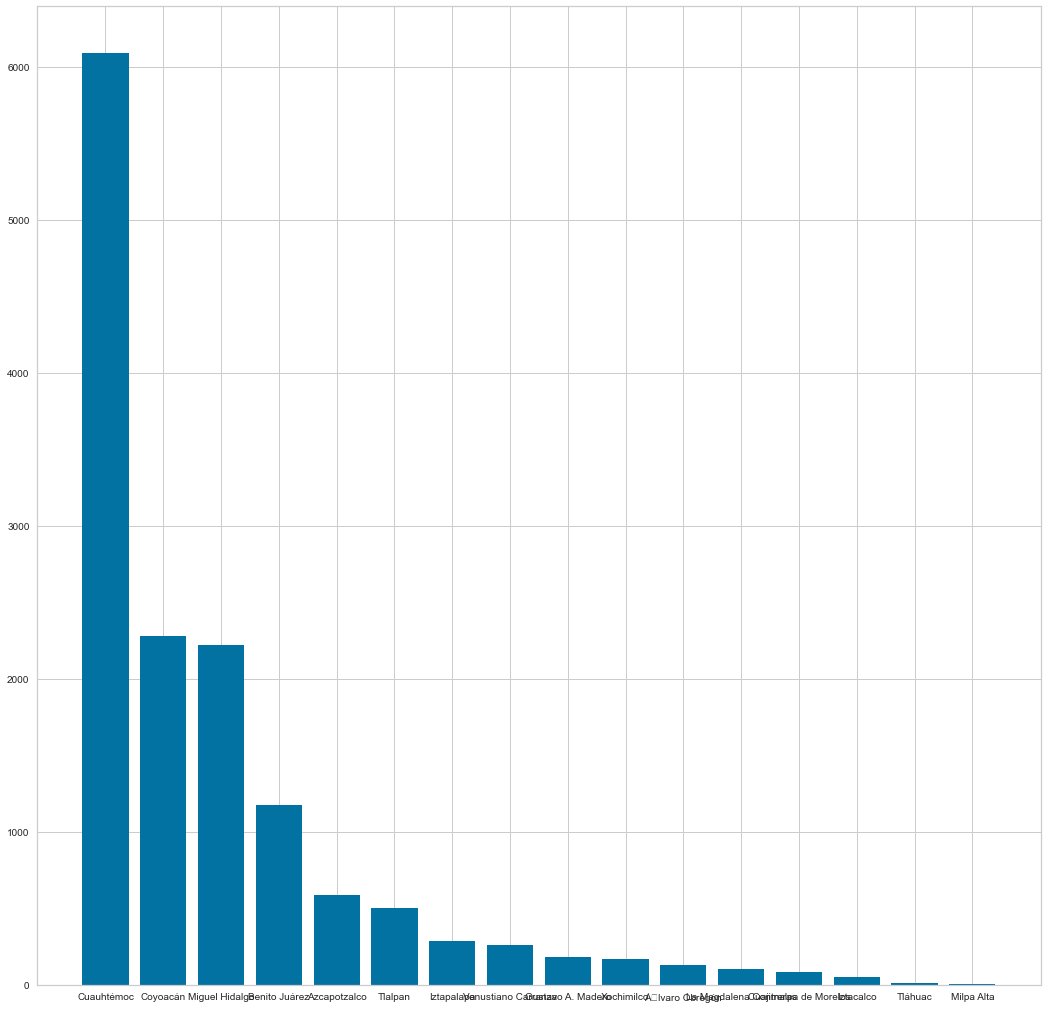

<Figure size 432x288 with 0 Axes>

In [41]:
mpl.figure(figsize=(18,18))
x = df['DELEGACION'].unique()
y = df['DELEGACION'].value_counts().values
mpl.bar(x,y)
mpl.show()
mpl.savefig("Delegaciones.jpg")

### Correlación 

##### Correlación de Pearson 

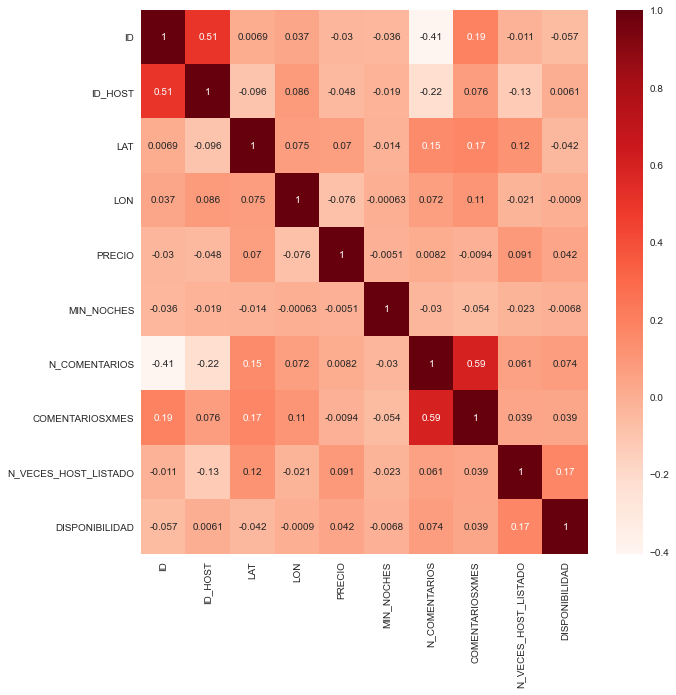

In [42]:
mpl.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=mpl.cm.Reds)
mpl.show()

Correlación respecto a la variable target "PRECIO"
Selección de características altamente correlacionadas

In [43]:
cor_target = abs(cor["PRECIO"])
relevant_features = cor_target[cor_target>0]
relevant_features

ID                      0.030279
ID_HOST                 0.048451
LAT                     0.069920
LON                     0.076052
PRECIO                  1.000000
MIN_NOCHES              0.005118
N_COMENTARIOS           0.008248
COMENTARIOSXMES         0.009380
N_VECES_HOST_LISTADO    0.091342
DISPONIBILIDAD          0.041596
Name: PRECIO, dtype: float64

Para el modelo de regreseión se espera que se tenga una mayor relación entre las variables explicativas y la variable objetivo.

#### Correlación de Spearman y Tau de Kendall

Se busco aplicar la correlación de Spearman y la Tau de Kendall para nuestras variables categóricas, pero al ser estás nominales y no ordinales el resultado que se obtenga no será útil ni interpretable.

### Asociaciones de Variables

#### DELEGACIÓN ~ PRECIO 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PRECIO', ylabel='DELEGACION'>

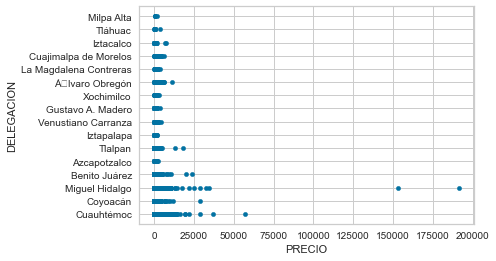

In [44]:
df.plot(kind='scatter',x='PRECIO',y='DELEGACION')

Complementar que desde aqui podemos ver que la hipotesis que en MIGUEL HIDALGO y COYOACÁN no 

#### DELEGACIÓN ~  MIN NOCHES

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MIN_NOCHES', ylabel='DELEGACION'>

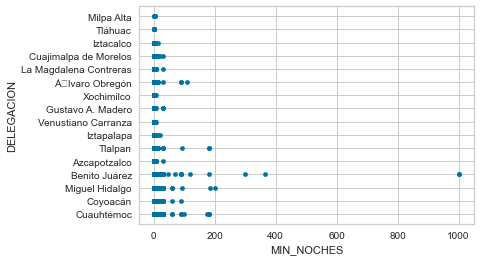

In [45]:
df.plot(kind='scatter',y='DELEGACION',x='MIN_NOCHES')

#### DELEGACIÓN ~  N COMENTARIOS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='N_COMENTARIOS', ylabel='DELEGACION'>

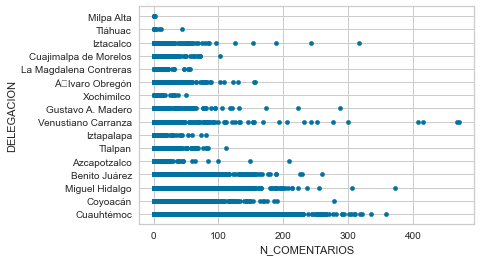

In [46]:
df.plot(kind='scatter',y='DELEGACION',x='N_COMENTARIOS')

#### DELEGACIÓN ~  N VECES HOST LISTADO

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='N_VECES_HOST_LISTADO', ylabel='DELEGACION'>

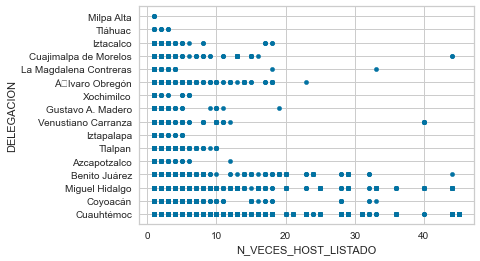

In [47]:
df.plot(kind='scatter',y='DELEGACION',x='N_VECES_HOST_LISTADO')

#### DELEGACIÓN ~  COMENTARIOS X POR MES

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='COMENTARIOSXMES', ylabel='DELEGACION'>

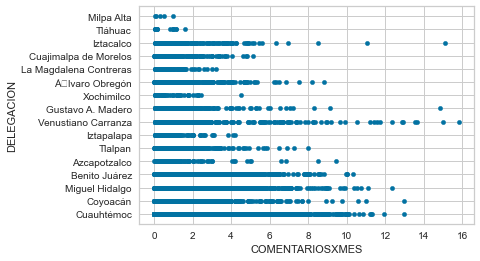

In [48]:
df.plot(kind='scatter',y='DELEGACION',x='COMENTARIOSXMES')

#### DELEGACIÓN ~ DISPONIBILIDAD

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DISPONIBILIDAD', ylabel='DELEGACION'>

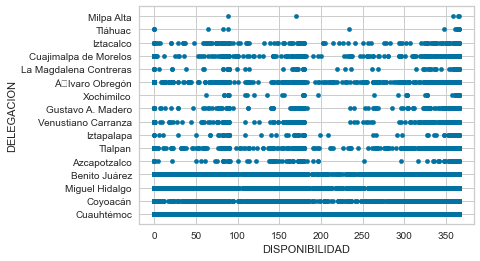

In [49]:
df.plot(kind='scatter',y='DELEGACION',x='DISPONIBILIDAD')

#### TIPO HABITACIÓN ~ PRECIO

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PRECIO', ylabel='TIPO_HABITACION'>

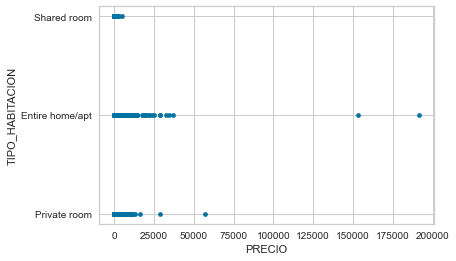

In [50]:
df.plot(kind='scatter',x='PRECIO',y='TIPO_HABITACION')

#### TIPO HABITACION ~  MIN NOCHES

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MIN_NOCHES', ylabel='TIPO_HABITACION'>

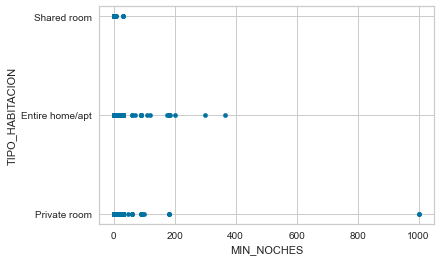

In [51]:
df.plot(kind='scatter',x='MIN_NOCHES',y='TIPO_HABITACION')

#### TIPO HABITACION ~  N COMENTARIOS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='N_COMENTARIOS', ylabel='TIPO_HABITACION'>

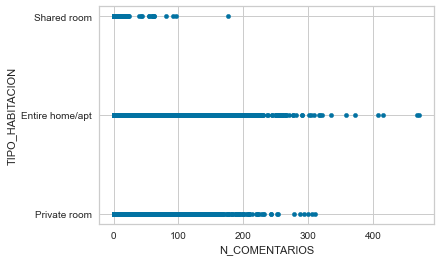

In [52]:

df.plot(kind='scatter',x='N_COMENTARIOS',y='TIPO_HABITACION')

#### TIPO HABITACION ~  N VECES HOST LISTADO

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='N_VECES_HOST_LISTADO', ylabel='TIPO_HABITACION'>

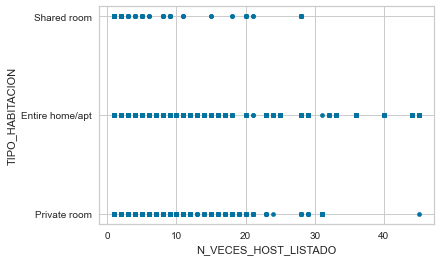

In [53]:
df.plot(kind='scatter',y='TIPO_HABITACION',x='N_VECES_HOST_LISTADO')

#### TIPO HABITACION ~  COMENTARIOS X POR

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='COMENTARIOSXMES', ylabel='TIPO_HABITACION'>

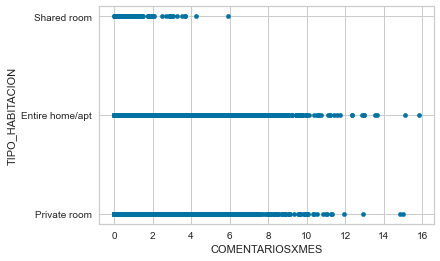

In [54]:
df.plot(kind='scatter',y='TIPO_HABITACION',x='COMENTARIOSXMES')

#### TIPO HABITACION ~ DISPONIBILIDAD

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DISPONIBILIDAD', ylabel='TIPO_HABITACION'>

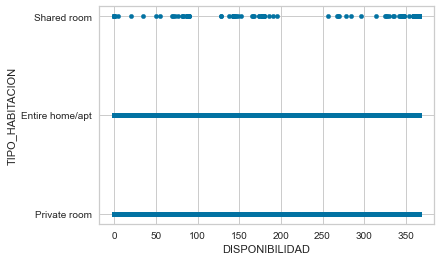

In [55]:
df.plot(kind='scatter',y='TIPO_HABITACION',x='DISPONIBILIDAD')

#### DELEGACIÓN ~ TIPO HABITACIÓN 

In [56]:
df[["ID","DELEGACION", "TIPO_HABITACION"]].groupby(["DELEGACION", "TIPO_HABITACION"]).count()

ID
DELEGACION             TIPO_HABITACION      
Azcapotzalco           Entire home/apt    47
                       Private room       83
                       Shared room         2
Benito Juárez          Entire home/apt  1022
                       Private room     1176
                       Shared room        23
Coyoacán               Entire home/apt   434
                       Private room      719
                       Shared room        23
Cuajimalpa de Morelos  Entire home/apt   162
                       Private room      119
                       Shared room         3
Cuauhtémoc             Entire home/apt  3781
                       Private room     2231
                       Shared room        80
Gustavo A. Madero      Entire home/apt    56
                       Private room      120
                       Shared room         5
Iztacalco              Entire home/apt    78
                       Private room       83
                       Shared room         8
Iztapalapa             Entire home/apt    28
                       Private room       74
                       Shared room         3
La Magdalena Contreras Entire home/apt    36
                       Private room       51
Miguel Hidalgo         Entire home/apt  1440
                       Private room      822
                       Shared room        19
Milpa Alta             Entire home/apt     3
                       Private room        2
Tlalpan                Entire home/apt   174
                       Private room      321
                       Shared room         9
Tláhuac                Entire home/apt     6
                       Private room        8
                       Shared room         1
Venustiano Carranza    Entire home/apt   123
                       Private room      127
                       Shared room        11
Xochimilco             Entire home/apt    22
                       Private room       30
Álvaro Obregón        Entire home/apt   272
                       Private room      314
                       Shared room         3

## 3.- Data Preparation

#### DF VARIABLES NÚMERICAS

In [57]:
df_num = df[['PRECIO', 'MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']]
df_num.head()

,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
1,1969,1,57,0.52,9,355,19.44076,-99.16324
4,1893,1,39,0.42,10,334,19.41006,-99.17645
5,1625,3,39,0.43,1,178,19.42292,-99.15775
6,956,2,51,2.55,3,180,19.41259,-99.17959
7,1816,2,39,0.42,3,361,19.41375,-99.17028


#### DF VARIABLES CATEGÓRICAS

In [58]:
df_cat = df[['DELEGACION','TIPO_HABITACION',  'ULTIMO_COMENTARIO','ID', 'RAZONSOCIAL', 'ID_HOST', 'HOST_NOMBRE']]
df_cat.head()

,DELEGACION,TIPO_HABITACION,ULTIMO_COMENTARIO,ID,RAZONSOCIAL,ID_HOST,HOST_NOMBRE
1,Cuauhtémoc,Private room,27/05/2019,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego
4,Cuauhtémoc,Private room,02/05/2019,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX
5,Cuauhtémoc,Entire home/apt,28/05/2019,58955,Entire beautiful duplex in la Roma,282620,Nat
6,Cuauhtémoc,Private room,05/04/2019,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto
7,Cuauhtémoc,Entire home/apt,24/02/2019,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas


### DATAFRAMES PARA LA REGRECIÓN

##### DF1 SOLO VARIABLES NUMERICAS 

In [59]:
df_reg_1 = df_num.copy()

In [60]:
df_reg_1.head()

,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
1,1969,1,57,0.52,9,355,19.44076,-99.16324
4,1893,1,39,0.42,10,334,19.41006,-99.17645
5,1625,3,39,0.43,1,178,19.42292,-99.15775
6,956,2,51,2.55,3,180,19.41259,-99.17959
7,1816,2,39,0.42,3,361,19.41375,-99.17028


In [61]:
df_reg_1.shape

(14154, 8)

In [62]:
X1_T, X1_P, Y1_T, Y1_P = train_test_split(df_reg_1[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_1['PRECIO'], test_size=0.1)

##### DF2 SOLO VARIABLES NUMERICAS SIN OUTLIERS DE PRECIO

In [63]:
df_reg_2 = df_reg_1[df_reg_1['PRECIO']<9000]

In [64]:
df_reg_2.head()

,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
1,1969,1,57,0.52,9,355,19.44076,-99.16324
4,1893,1,39,0.42,10,334,19.41006,-99.17645
5,1625,3,39,0.43,1,178,19.42292,-99.15775
6,956,2,51,2.55,3,180,19.41259,-99.17959
7,1816,2,39,0.42,3,361,19.41375,-99.17028


In [65]:
df_reg_2.shape

(14097, 8)

In [66]:
X2_T, X2_P, Y2_T, Y2_P = train_test_split(df_reg_2[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_2['PRECIO'], test_size=0.1)

#### DF3 PRECIO ~ DELEGACION ~ HABITACION

In [67]:
df_reg_3 = df[['PRECIO']]
df_reg_3.head()

,PRECIO
1,1969
4,1893
5,1625
6,956
7,1816


In [68]:
keys = list(df['DELEGACION'].unique())
vals = range(1,17)
act = dict(zip(keys, vals))
keys2 = list(df['TIPO_HABITACION'].unique())
vals2 = range(1,4)
act2 = dict(zip(keys2, vals2))

In [69]:
act

{'Cuauhtémoc': 1,
 'Coyoacán': 2,
 'Miguel Hidalgo': 3,
 'Benito Juárez': 4,
 'Azcapotzalco': 5,
 'Tlalpan': 6,
 'Iztapalapa': 7,
 'Venustiano Carranza': 8,
 'Gustavo A. Madero': 9,
 'Xochimilco': 10,
 'Á\x81lvaro Obregón': 11,
 'La Magdalena Contreras': 12,
 'Cuajimalpa de Morelos': 13,
 'Iztacalco': 14,
 'Tláhuac': 15,
 'Milpa Alta': 16}

In [70]:
act2

{'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3}

In [71]:
df_reg_3['DELEGACION'] = df['DELEGACION'].map(act)
df_reg_3['T_HABITACION'] = df['TIPO_HABITACION'].map(act2)

<ipython-input-71-d20081447411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_3['DELEGACION'] = df['DELEGACION'].map(act)
<ipython-input-71-d20081447411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_3['T_HABITACION'] = df['TIPO_HABITACION'].map(act2)


In [72]:
df_reg_3.head(3)

,PRECIO,DELEGACION,T_HABITACION
1,1969,1,1
4,1893,1,1
5,1625,1,2


In [73]:
df_reg_3.shape

(14154, 3)

In [74]:
X3_T, X3_P, Y3_T, Y3_P = train_test_split(df_reg_3[['DELEGACION','T_HABITACION']], df_reg_3['PRECIO'], test_size=0.1)

##### DF4 PRECIO ~ DELEGACION ~ HABITACION SIN OUTLIERS DE PRECIO

In [75]:
df_reg_4 = df_reg_3[df_reg_3['PRECIO']<9000]

In [76]:
df_reg_4.head(4)

,PRECIO,DELEGACION,T_HABITACION
1,1969,1,1
4,1893,1,1
5,1625,1,2
6,956,1,1


In [77]:
df_reg_4.shape

(14097, 3)

In [78]:
X4_T, X4_P, Y4_T, Y4_P = train_test_split(df_reg_4[['DELEGACION','T_HABITACION']], df_reg_4['PRECIO'], test_size=0.1)

##### DF5 PRECIO ~ DELEGACION ~ HABITACION SIN DELEGACIONES DOMINANTES

In [79]:
df_reg_5 = df_reg_3[df_reg_3['DELEGACION']!=1] #Cuauhtemoc
df_reg_5 = df_reg_5[df_reg_5['DELEGACION']!=3] #Miguel Hidalgo
df_reg_5 = df_reg_5[df_reg_5['DELEGACION']!=4] #Bénito Juárez

In [80]:
df_reg_5.head()

,PRECIO,DELEGACION,T_HABITACION
8,1051,2,2
9,1128,2,2
30,631,5,1
43,382,2,1
45,268,6,1


In [81]:
df_reg_5.shape

(3560, 3)

In [82]:
X5_T, X5_P, Y5_T, Y5_P = train_test_split(df_reg_5[['DELEGACION','T_HABITACION']], df_reg_5['PRECIO'], test_size=0.1)

##### DF6 PRECIO ~ DELEGACION ~ HABITACION SIN DELEGACIONES DOMINANTES Y SIN OUTLIERS DE PRECIO

In [83]:
df_reg_6 = df_reg_5[df_reg_5['PRECIO']<9000]

In [84]:
df_reg_6.head()

,PRECIO,DELEGACION,T_HABITACION
8,1051,2,2
9,1128,2,2
30,631,5,1
43,382,2,1
45,268,6,1


In [85]:
df_reg_6.shape

(3554, 3)

In [86]:
X6_T, X6_P, Y6_T, Y6_P = train_test_split(df_reg_6[['DELEGACION','T_HABITACION']], df_reg_6['PRECIO'], test_size=0.1)

##### DF7 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION

In [87]:
df_reg_7= df_reg_3.copy()

In [88]:
df_reg_7[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']] = df[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']]
df_reg_7.head(3)

,PRECIO,DELEGACION,T_HABITACION,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
1,1969,1,1,1,57,0.52,9,355,19.44076,-99.16324
4,1893,1,1,1,39,0.42,10,334,19.41006,-99.17645
5,1625,1,2,3,39,0.43,1,178,19.42292,-99.15775


In [89]:
df_reg_7.shape

(14154, 10)

In [90]:
X7_T, X7_P, Y7_T, Y7_P = train_test_split(df_reg_7[['DELEGACION','T_HABITACION','MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_7['PRECIO'], test_size=0.1)

##### DF8 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN OUTLIERS DE PRECIO

In [91]:
df_reg_8 = df_reg_7[df_reg_7['PRECIO']<=9000]

In [92]:
df_reg_8.head(3)

,PRECIO,DELEGACION,T_HABITACION,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
1,1969,1,1,1,57,0.52,9,355,19.44076,-99.16324
4,1893,1,1,1,39,0.42,10,334,19.41006,-99.17645
5,1625,1,2,3,39,0.43,1,178,19.42292,-99.15775


In [93]:
df_reg_8.shape

(14097, 10)

In [94]:
X8_T, X8_P, Y8_T, Y8_P = train_test_split(df_reg_8[['DELEGACION','T_HABITACION','MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_8['PRECIO'], test_size=0.1)

##### DF9 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN DELEGACIONES DOMINANTES

In [95]:
df_reg_9 = df_reg_7[df_reg_7['DELEGACION']!=1] #Cuauhtemoc
df_reg_9 = df_reg_9[df_reg_9['DELEGACION']!=3] #Miguel Hidalgo
df_reg_9 = df_reg_9[df_reg_9['DELEGACION']!=4] #Benito Juarez 

In [96]:
df_reg_9.head(4)

,PRECIO,DELEGACION,T_HABITACION,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
8,1051,2,2,3,92,1.03,4,295,19.35601,-99.16167
9,1128,2,2,3,31,0.31,4,327,19.35466,-99.16304
30,631,5,1,1,10,1.36,1,0,19.49886,-99.19172
43,382,2,1,2,153,1.99,2,287,19.34004,-99.18273


In [97]:
df_reg_9.shape

(3560, 10)

In [98]:
X9_T, X9_P, Y9_T, Y9_P = train_test_split(df_reg_9[['DELEGACION','T_HABITACION','MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_9['PRECIO'], test_size=0.1)

##### DF10 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN DELEGACIONES DOMINANTES SIN OUTLIERS DE PRECIO

In [99]:
df_reg_10 = df_reg_9[df_reg_9['PRECIO']<9000]

In [100]:
df_reg_10.head(4)

,PRECIO,DELEGACION,T_HABITACION,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,LAT,LON
8,1051,2,2,3,92,1.03,4,295,19.35601,-99.16167
9,1128,2,2,3,31,0.31,4,327,19.35466,-99.16304
30,631,5,1,1,10,1.36,1,0,19.49886,-99.19172
43,382,2,1,2,153,1.99,2,287,19.34004,-99.18273


In [101]:
df_reg_10.shape

(3554, 10)

In [102]:
X10_T, X10_P, Y10_T, Y10_P = train_test_split(df_reg_10[['DELEGACION','T_HABITACION','MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_10['PRECIO'], test_size=0.1)

### DATAFRAMES PARA EL CLÚSTER

##### DF CLUSTER 

In [103]:
df_clus = df_reg_7[['PRECIO','DELEGACION','T_HABITACION','MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD']]

In [104]:
df_clus.head()

,PRECIO,DELEGACION,T_HABITACION,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD
1,1969,1,1,1,57,0.52,9,355
4,1893,1,1,1,39,0.42,10,334
5,1625,1,2,3,39,0.43,1,178
6,956,1,1,2,51,2.55,3,180
7,1816,1,2,2,39,0.42,3,361


In [105]:
X = df_clus.values
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

## 4.- Modeling 

### 4.1 Regresión

##### DF1 SOLO VARIABLES NUMERICAS 

In [106]:
lr1 = LinearRegression(normalize=True)
lr1.fit(X1_T, Y1_T)

LinearRegression(normalize=True)

##### DF2 SOLO VARIABLES NUMERICAS SIN OUTLIERS DE PRECIO

In [107]:
lr2 = LinearRegression(normalize=True)
lr2.fit(X2_T, Y2_T)

LinearRegression(normalize=True)

##### DF3 PRECIO ~ DELEGACION ~ HABITACION

In [108]:
lr3 = LinearRegression(normalize=True)
lr3.fit(X3_T, Y3_T)

LinearRegression(normalize=True)

##### DF4 PRECIO ~ DELEGACION ~ HABITACION SIN OUTLIERS DE PRECIO

In [109]:
lr4 = LinearRegression(normalize=True)
lr4.fit(X4_T, Y4_T)

LinearRegression(normalize=True)

##### DF5 PRECIO ~ DELEGACION ~ HABITACION SIN DELEGACIONES DOMINANTES

In [110]:
lr5 = LinearRegression(normalize=True)
lr5.fit(X5_T, Y5_T)

LinearRegression(normalize=True)


##### DF6 PRECIO ~ DELEGACION ~ HABITACION SIN DELEGACIONES DOMINANTES Y SIN OUTLIERS DE PRECIO

In [111]:
lr6 = LinearRegression(normalize=True)
lr6.fit(X6_T, Y6_T)

LinearRegression(normalize=True)

##### DF7 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION

In [112]:
lr7 = LinearRegression(normalize=True)
lr7.fit(X7_T, Y7_T)

LinearRegression(normalize=True)

##### DF8 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN OUTLIERS DE PRECIO

In [113]:
lr8 = LinearRegression(normalize=True)
lr8.fit(X8_T, Y8_T)

LinearRegression(normalize=True)

##### DF9 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN DELEGACIONES DOMINANTES

In [114]:
lr9 = LinearRegression(normalize=True)
lr9.fit(X9_T, Y9_T)

LinearRegression(normalize=True)

##### DF10 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN DELEGACIONES DOMINANTES SIN OUTLIERS DE PRECIO

In [115]:
lr10 = LinearRegression(normalize=True)
lr10.fit(X10_T, Y10_T)

LinearRegression(normalize=True)

### 4.2 Clusterización 

Con base en el punto de inflexión del método del codo seleccionamos el número óptimo de clústers.

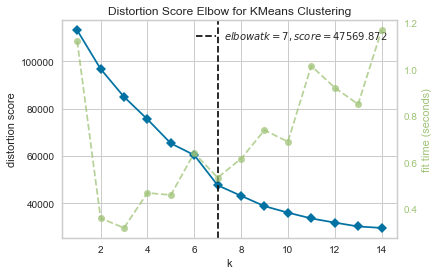

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(X)       
visualizer.show()       

El método de K-means++ seleeciona los centroides dentro de los principales aconglomerados

In [117]:
k_means = KMeans(init = "k-means++", n_clusters = 8, n_init=10, max_iter=300)

In [118]:
k_means.fit(X)

KMeans()

In [119]:
k_means.inertia_

43106.594397333836

In [120]:
k_means.n_iter_

20

y_kmeans = k_means.fit_predict(X)
y_kmeans

In [121]:
labels = k_means.labels_
labels

array([2, 2, 1, ..., 5, 2, 0])

In [122]:
df_clus["CLUSTER"] = labels

<ipython-input-122-976cc04a673d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus["CLUSTER"] = labels


In [123]:
clusters = df_clus['CLUSTER'].values

In [124]:
pca = PCA(n_components = 2)
pca_cluster = pca.fit_transform(X)
pca_cluster_df = pd.DataFrame(data=pca_cluster, columns=['COMPONENTE 1','COMPONENTE 2'])
comp1 = pca_cluster_df['COMPONENTE 1'].values
comp2 = pca_cluster_df['COMPONENTE 2'].values
a = pd.DataFrame(data=comp2)
b = pd.DataFrame(data=comp1)
c = pd.DataFrame(data=clusters)

In [125]:
pca_df = pd.concat([a, b, c], axis=1, join='inner')
pca_df.columns = ['Componente 1', 'Componente 2', 'cluster']

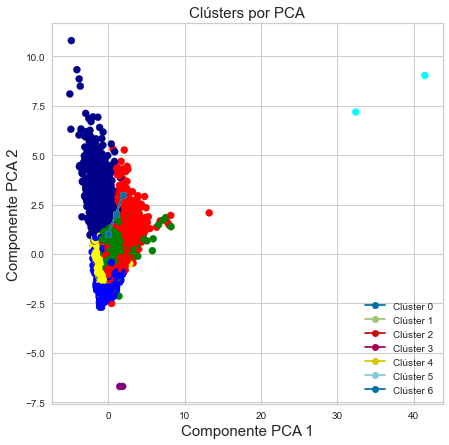

In [126]:
fig = mpl.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente PCA 1', fontsize = 15)
ax.set_ylabel('Componente PCA 2', fontsize = 15)
ax.set_title('Clústers por PCA', fontsize = 15)
color_theme = np.array(['blue','green','red','red','purple','yellow','cyan','darkblue'])
scatter = ax.scatter(x = pca_df['Componente 1'], y = pca_df['Componente 2'], c=color_theme[pca_df.cluster], s=50)
line1, = mpl.plot([1, 2, 3], marker='o', label='Clúster 0')
line2, = mpl.plot([1, 2, 3], marker='o', label='Clúster 1')
line3, = mpl.plot([1, 2, 3], marker='o', label='Clúster 2')
line4, = mpl.plot([1, 2, 3], marker='o', label='Clúster 3')
line5, = mpl.plot([1, 2, 3], marker='o', label='Clúster 4')
line6, = mpl.plot([1, 2, 3], marker='o', label='Clúster 5')
line7, = mpl.plot([1, 2, 3], marker='o', label='Clúster 6')
mpl.legend(handler_map={line1: HandlerLine2D(numpoints=1)})
mpl.legend(handler_map={line2: HandlerLine2D(numpoints=1)})
mpl.legend(handler_map={line3: HandlerLine2D(numpoints=1)})
mpl.legend(handler_map={line4: HandlerLine2D(numpoints=1)})
mpl.legend(handler_map={line5: HandlerLine2D(numpoints=1)})
mpl.legend(handler_map={line6: HandlerLine2D(numpoints=1)})
mpl.legend(handler_map={line7: HandlerLine2D(numpoints=1)})

Como se aprecia en la gráfica los clusters obtenidos no tienen una sepración muy clara.

In [127]:
df_clus.groupby('CLUSTER').describe()

PRECIO                                                              \
          count           mean           std       min        25%       50%   
CLUSTER                                                                       
0        1460.0     815.867123    806.725563     172.0     344.00     554.0   
1        5217.0    1436.950738   1696.271892       0.0     765.00    1090.0   
2        2360.0     566.885169    694.327144       0.0     287.00     401.0   
3         699.0    1912.363376   3097.938551       0.0     755.50    1204.0   
4           2.0     200.500000     13.435029     191.0     195.75     200.5   
5        2654.0     500.324416    570.417832     115.0     287.00     401.0   
6           2.0  172053.000000  27035.520672  152936.0  162494.50  172053.0   
7        1760.0    1109.925568    856.158060       0.0     574.00     937.0   

                             DELEGACION             ... N_VECES_HOST_LISTADO  \
               75%       max      count       mean  ...                  75%   
CLUSTER                                             ...                        
0           994.00   11279.0     1460.0  11.345890  ...                 3.00   
1          1606.00   36705.0     5217.0   2.257619  ...                 3.00   
2           574.00   13114.0     2360.0   2.774153  ...                 4.00   
3          2103.00   57351.0      699.0   2.015737  ...                36.00   
4           205.25     210.0        2.0   4.000000  ...                 1.75   
5           554.00   16249.0     2654.0   2.576488  ...                 2.00   
6        181611.50  191170.0        2.0   3.000000  ...                 3.25   
7          1376.00   11853.0     1760.0   2.023864  ...                 5.00   

              DISPONIBILIDAD                                                \
          max          count        mean         std    min     25%    50%   
CLUSTER                                                                      
0        23.0         1460.0  229.022603  128.591719    0.0  111.00  259.5   
1        17.0         5217.0  199.961472  129.802832    0.0   83.00  179.0   
2        20.0         2360.0  339.345339   34.634588  204.0  327.00  357.0   
3        45.0          699.0  289.698140  104.336911    0.0  250.50  344.0   
4         2.0            2.0  134.500000   62.932504   90.0  112.25  134.5   
5        20.0         2654.0   89.195554   69.851761    0.0    5.00   87.0   
6         4.0            2.0  267.000000  131.521861  174.0  220.50  267.0   
7        29.0         1760.0  234.642614  113.593408    0.0  142.00  284.0   

                        
            75%    max  
CLUSTER                 
0        359.00  365.0  
1        334.00  365.0  
2        364.00  365.0  
3        360.00  365.0  
4        156.75  179.0  
5        168.00  219.0  
6        313.50  360.0  
7        336.00  365.0  

[8 rows x 64 columns]

## 5 Evaluation

### 5.1 Regreseión 

##### DF1 SOLO VARIABLES NUMERICAS 

In [128]:
lr1.score(X1_P, Y1_P)


0.04852403045643383

In [129]:
scores = cross_val_score(lr1, df_reg_1[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_1['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [130]:
scores.mean()

-6097916.39053237

In [131]:
scores.std()

6898851.85817393

##### DF2 SOLO VARIABLES NUMERICAS SIN OUTLIERS DE PRECIO

In [132]:
lr2.score(X2_P, Y2_P)

0.1277002865646929

In [133]:
scores = cross_val_score(lr2, df_reg_2[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_2['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [134]:
scores.mean()

-760887.3719278314

In [135]:
scores.std()

105900.43514346362

##### DF3 PRECIO ~ DELEGACION ~ HABITACION

In [136]:
lr3.score(X3_P, Y3_P)

0.11852271066350395

In [137]:
scores = cross_val_score(lr3, df_reg_3[['DELEGACION','T_HABITACION']], df_reg_3['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [138]:
scores.mean()

-6030640.56279268

In [139]:
scores.std()

6884874.1765061375

##### DF4 PRECIO ~ DELEGACION ~ HABITACION SIN OUTLIERS DE PRECIO

In [140]:
lr4.score(X4_P, Y4_P)

0.15843015439002428

In [141]:
scores = cross_val_score(lr4, df_reg_4[['DELEGACION','T_HABITACION']], df_reg_4['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [142]:
scores.mean()

-694859.7709831382

In [143]:
scores.std()

113397.89073198372

##### DF5 PRECIO ~ DELEGACION ~ HABITACION SIN DELEGACIONES DOMINANTES

In [144]:
lr5.score(X5_P, Y5_P)

0.13893843428157793

In [145]:
scores = cross_val_score(lr5, df_reg_5[['DELEGACION','T_HABITACION']], df_reg_5['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [146]:
scores.mean()

-861713.2353271355

In [147]:
scores.std()

637725.8024901225

##### DF6 PRECIO ~ DELEGACION ~ HABITACION SIN DELEGACIONES DOMINANTES Y SIN OUTLIERS DE PRECIO

In [148]:
lr6.score(X6_P, Y6_P)

0.12489252924952166

In [149]:
scores = cross_val_score(lr6, df_reg_6[['DELEGACION','T_HABITACION']], df_reg_6['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [150]:
scores.mean()

-429741.3332649563

In [151]:
scores.std()

95567.43241863704

##### DF7 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION

In [152]:
lr7.score(X7_P, Y7_P)

0.19103736591476683

In [153]:
scores = cross_val_score(lr7, df_reg_7[['DELEGACION','T_HABITACION']], df_reg_7['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [154]:
scores.mean()

-6030640.56279268

In [155]:
scores.std()

6884874.1765061375

##### DF8 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN OUTLIERS DE PRECIO

In [156]:
lr8.score(X8_P, Y8_P)

0.2477637663178629

In [157]:
scores = cross_val_score(lr8, df_reg_8[['DELEGACION','T_HABITACION']], df_reg_8['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [158]:
scores.mean()

-694859.7709831382

In [159]:
scores.std()

113397.89073198372

##### DF9 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN DELEGACIONES DOMINANTES

In [160]:
lr9.score(X9_P, Y9_P)

0.17684740062263704

In [161]:
scores = cross_val_score(lr9, df_reg_9[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_9['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [162]:
scores.mean()

-884053.7061266946

In [163]:
scores.std()

634427.4129971743

##### DF10 TODAS LAS VARIABLES NUMERICAS + DELEGACION + TIPO HABITACION SIN DELEGACIONES DOMINANTES SIN OUTLIERS DE PRECIO

In [164]:
lr10.score(X10_P, Y10_P)

0.09784812642639917

In [165]:
scores = cross_val_score(lr10, df_reg_10[['MIN_NOCHES', 'N_COMENTARIOS', 'COMENTARIOSXMES', 'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD', 'LAT', 'LON']], df_reg_10['PRECIO'], cv=7, scoring='neg_mean_squared_error')

In [166]:
scores.mean()

-453173.34200946084

In [167]:
scores.std()

102026.34030162622

### 5.2 Clusterización 

En el código Hopkins.R en R hacemos aplicamos a la mustra un análisis sobre el Estadísitico de Hopkins.